In [36]:
"""
描述: 根据工年预测工资
参考: https://www.kaggle.com/code/ybifoundation/simple-linear-regression/notebook
"""

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = pd.read_csv('./data/salary_data.csv')
X = df['Experience Years'].values.reshape(-1, 1)  # 转为列向量
y = df['Salary'].values.reshape(-1, 1) / 10000


def plot_sample_data(X, y):
    plt.scatter(X, y, color='blue')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()


def plot_linear_regression(X, y, model):
    """ 绘制线性回归的结果 """
    model.eval()
    clear_output(wait=True)
    plt.scatter(X, y, color='blue')
    plt.plot(X, model(torch.from_numpy(X).float().to(device)).cpu().detach().numpy(), color='red')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()

# plot_sample_data(X, y)

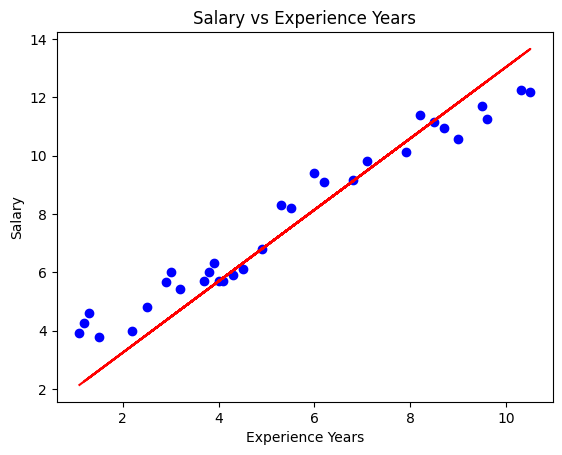

In [39]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        # 手动初始化权重
        self.linear.weight = nn.Parameter(torch.tensor([[0.01]]))

    def forward(self, x):
        return self.linear(x)

    def predict(self, x):
        return self.forward(x) * 10000


input_dim = X_train.shape[1]
output_dim = 1
model = LinearRegression(input_dim, output_dim)
model.to(device)
criteria = nn.MSELoss()
learning_rate = 0.005
iterations = 10000

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

inputs = torch.from_numpy(X_train).float().to(device)
labels = torch.from_numpy(y_train).float().to(device)

for i in range(iterations):
    plot_linear_regression(X_train, y_train, model)
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criteria(outputs, labels)
    loss.backward()  # compute gradients
    optimizer.step()  # update weights
    if i % 1000 == 0:
        print('epoch {}, loss {}'.format(i, loss.item()))

In [5]:
# 打印模型参数和截距
model.linear.weight, model.linear.bias

(Parameter containing:
 tensor([[0.9510]], requires_grad=True),
 Parameter containing:
 tensor([2.6125], requires_grad=True))

In [8]:
# 使用测试数据集评估模型
inputs = torch.from_numpy(X_test).float().to(device)
labels = torch.from_numpy(y_test).float().to(device)
outputs = model(inputs)
loss = criteria(outputs, labels)
print('loss on test data', loss.item())

loss on test data 0.3176531195640564


In [10]:
# 根据工作年限预测工资
years = 5
salary = model.predict(torch.tensor([years]).float().to(device))
salary.item()

73674.25